In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv as read
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

In [2]:
class Solver:
    def __init__(self, data, y_name, lb_ecnoder_columns=[], dummies_columns=[]):
        self.data=copy.deepcopy(data)
        self.lb_ecnoder_columns = lb_ecnoder_columns
        self.dummies_columns = dummies_columns
        self.y_name = y_name
        self.X = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.X_train = pd.DataFrame()
        self.y = pd.DataFrame()
        self.y_test = pd.DataFrame()
        self.y_train = pd.DataFrame()
        self._data_prep()

        
    def _data_prep(self):
        #Подготовим данные (проработаем категориальные признаки, разобьем на тестовую и обучающую выборки)
        self._ecnoder(self.lb_ecnoder_columns)
        self.data = pd.get_dummies( self.data, columns = self.dummies_columns )
        self.y = self.data[self.y_name]
        self.X = copy.deepcopy(self.data)
        del self.X[self.y_name]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=666)
    def _ecnoder(self,lb_ecnoder_columns):
        for i in lb_ecnoder_columns:
            le = LabelEncoder()
            le.fit(self.data[i])
            self.data[i]=le.transform(self.data[i])

    def DTC_model(self, max_depth=None):
        model_name = 'DecisionTreeClassifier'
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=73)
        model.fit(self.X_train, self.y_train)
        #print(f'Accuracy of {model_name} = {model.score(self.X_test, self.y_test)}')
        print(classification_report(self.y_test, model.predict(self.X_test), target_names=['class 0', 'class 1']))
        
        
    def RND_model(self, max_depth=None):
        model_name = 'Random forest'
        model = RandomForestClassifier(max_depth=max_depth, random_state=73)
        model.fit(self.X_train, self.y_train)
        #print(f'Accuracy of {model_name} = {model.score(self.X_test, self.y_test)}')
        print(classification_report(self.y_test, model.predict(self.X_test), target_names=['class 0', 'class 1']))
        self._featuring_imp(model,self.X_train.columns,10, model_name)
        
        
    def Bagging_model(self, max_depth=None):
        model_name = 'Bagging of DTC'
        model = BaggingClassifier(base_estimator= RandomForestClassifier(), random_state=73)
        model.fit(self.X_train, self.y_train)
        #print(f'Accuracy of {model_name} = {model.score(self.X_test, self.y_test)}')
        print(classification_report(self.y_test, model.predict(self.X_test), target_names=['class 0', 'class 1']))
    
    def Linear_SVC(self):
        model_name = 'Linear_SVC'
        model = make_pipeline(
        StandardScaler(),
        LinearSVC(random_state=73, max_iter=10000))
        model.fit(self.X_train, self.y_train)
        #print(f'accuracy of {model_name} = {model.score(self.X_test, self.y_test)}')
        print(classification_report(self.y_test, model.predict(self.X_test), target_names=['class 0', 'class 1']))
    def SC(self):
        model_name = 'StackingClassifier'
        estimators = [
        ('DTC',DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('svr', make_pipeline(StandardScaler(),LinearSVC(max_iter=10000)))
                     ]
        model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
        model.fit(self.X_train, self.y_train)
        #print(f'accuracy of {model_name} = {model.score(self.X_test, self.y_test)}')
        print(classification_report(self.y_test, model.predict(self.X_test), target_names=['class 0', 'class 1']))
        
        
    def _featuring_imp(self,clf, feature_names, max_feat=-1, model_name='Модель'):
        feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
        feature_imp
        %matplotlib inline
        sns.barplot(x=feature_imp[:max_feat], y=feature_imp.index[:max_feat])
        plt.xlabel('Важность признаков')
        plt.ylabel('Признаки')
        plt.title(model_name)
        plt.show()

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
lb_ecnoder_columns=['Sex','RestingECG','ExerciseAngina','ST_Slope']
dummies_columns=['ChestPainType']

In [6]:
sv = Solver(data=data, y_name='HeartDisease', lb_ecnoder_columns=lb_ecnoder_columns, dummies_columns=dummies_columns)

In [7]:
sv.DTC_model()

              precision    recall  f1-score   support

     class 0       0.79      0.75      0.77        81
     class 1       0.81      0.84      0.83       103

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



              precision    recall  f1-score   support

     class 0       0.85      0.75      0.80        81
     class 1       0.82      0.89      0.86       103

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



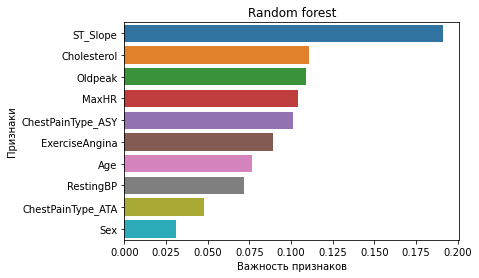

In [8]:
sv.RND_model()

In [9]:
sv.Bagging_model()

              precision    recall  f1-score   support

     class 0       0.85      0.74      0.79        81
     class 1       0.81      0.89      0.85       103

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184



In [11]:
sv.SC()

              precision    recall  f1-score   support

     class 0       0.85      0.77      0.81        81
     class 1       0.83      0.89      0.86       103

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

